<!--  --> 小冬菇
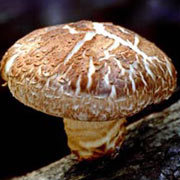

# 作图思路梳理
1.导入相关库

2.准备画布、数据

3.画图时指定坐标系ax=axes[]  或指定坐标系画图  axes[].plot

4.添加对象标题、图标题、文本注释

5.x轴的标签label、lim（边界）、刻度线范围、设置刻度sticks、sticklabel ax.set_x

6.添加网格线  ax.grid（）

7.添加图例    ax.legend(loc='')  upper ringht  lower left  # 原则上尽量放在不遮挡图形的地方


# 指定自己所需的工作路径
import os
# 查看修改前的工作路径
os.getcwd()
# 修改当前的工作路径
os.chdir(r'C:\Users\wangmengjie\Desktop\pycharm-哈哈哈')
# 查看修改后的工作路径
os.getcwd()

# 1.导入相关库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 关于时间的库
import time
import datetime

# 解决中文乱码的问题
plt.rcParams['font.sans-serif'] = 'SimHei' #SimHei 黑体
plt.rcParams['axes.unicode_minus'] = False

# 显示方式的设置
# pd.set_option('display.max_columns', None)

%matplotlib inline

# 2.准备画布、数据

In [2]:
# 准备数据
data=pd.read_csv('股票数据.csv',encoding='GBk')
data['日期']=pd.to_datetime(data['日期'])
data['年份']=data['日期'].dt.year
data['月份']=data['日期'].dt.month
data.head()

,日期,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值,成交笔数,年份,月份
0,2020-04-03,6.87,7.01,6.85,6.91,6.91,-0.04,-0.5789,0.7178,2375700,16455163.00,2273637492,2273637492,1638,2020,4
1,2020-04-02,6.91,6.94,6.77,6.82,6.92,-0.01,-0.1445,0.9391,3108118,21342821.22,2286875556,2286875556,2031,2020,4
2,2020-04-01,6.92,7.25,6.87,7.22,7.34,-0.42,-5.7221,2.0450,6767800,47458044.00,2290185072,2290185072,4520,2020,4
3,2020-03-31,7.34,7.50,7.27,7.45,7.45,-0.11,-1.4765,1.0597,3507000,25789407.00,2429184744,2429184744,2690,2020,3
4,2020-03-30,7.45,7.62,7.30,7.35,7.38,0.07,0.9485,1.4115,4671400,34906209.00,2465589420,2465589420,3205,2020,3


## 2.1 准备画布一
- fig.addsubplot:一个指定的画布上（Figure）添加一个子图（子坐标系）

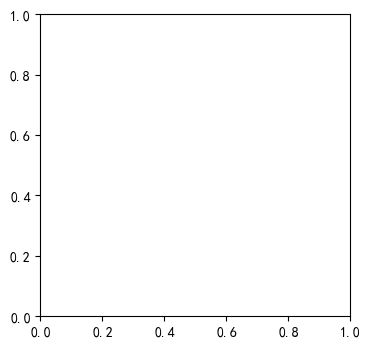

In [3]:
fig=plt.figure(figsize=(4,4),dpi=100)
# 添加一个子图
ax=fig.add_subplot(1,1,1)

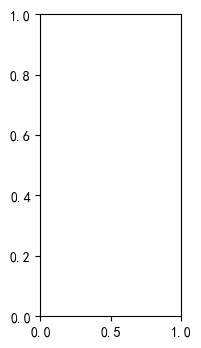

In [4]:
fig=plt.figure(figsize=(4,4),dpi=100)
ax1=fig.add_subplot(1,2,1)

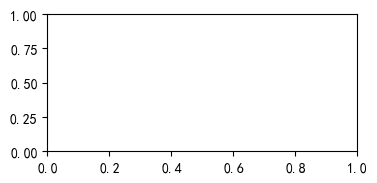

In [5]:
fig=plt.figure(figsize=(4,4),dpi=100)
ax2=fig.add_subplot(2,1,1)

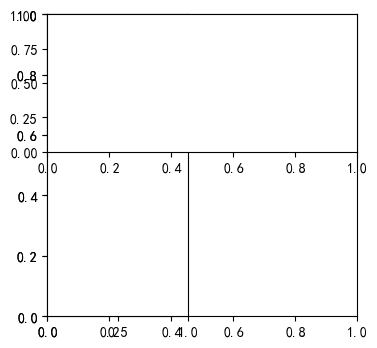

In [6]:
fig=plt.figure(figsize=(4,4),dpi=100)
ax=fig.add_subplot(1,1,1)
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(2,1,1)

## 2.1 准备画布二
- plt.subplots:同时建立一个figure对象和若干个子图对象   常用的作图方式

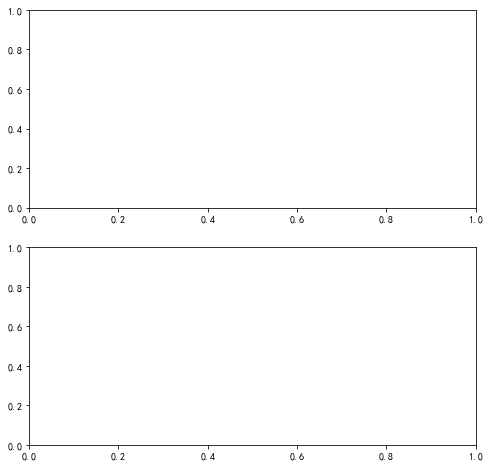

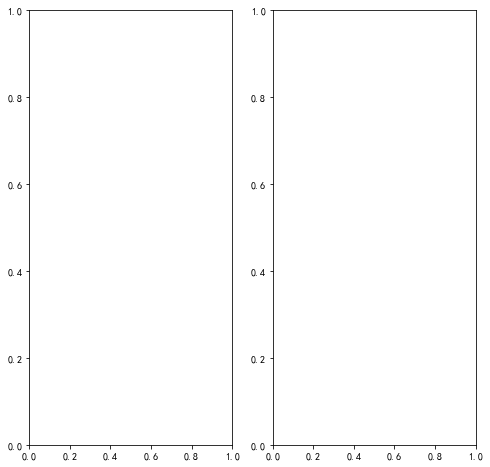

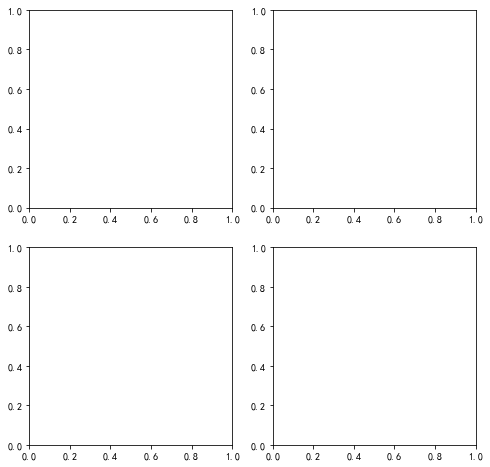

In [7]:
# 2行1列的两个坐标系
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(8,8))
# 1行2列的两个坐标系
fig,axes=plt.subplots(1,2,figsize=(8,8))
# 2行2列的四个坐标系
fig,axes=plt.subplots(2,2,figsize=(8,8))

# 3.绘图方式

## 3.1直接绘图

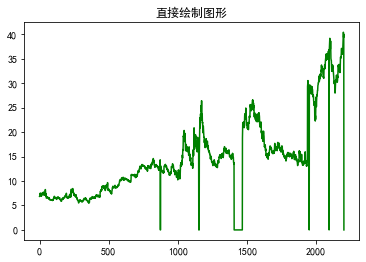

In [8]:
# 一图一线
data['收盘价'].plot(color='green',title='直接绘制图形');

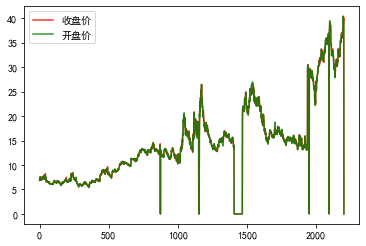

In [9]:
# 一图多线
# 查看【收盘价、开盘价】
# data.iloc[:,[1,4]]
data.loc[:,['收盘价','开盘价']].plot(color=['red','green'],y=['收盘价','开盘价'],alpha=0.8)
# y=['收盘价','开盘价'] 是y标签

## 3.2 创建坐标系，在坐标系上绘图
- 一般是多个坐标系，需要手动指定坐标系作图

### 3.2.1 绘图中指定坐标系

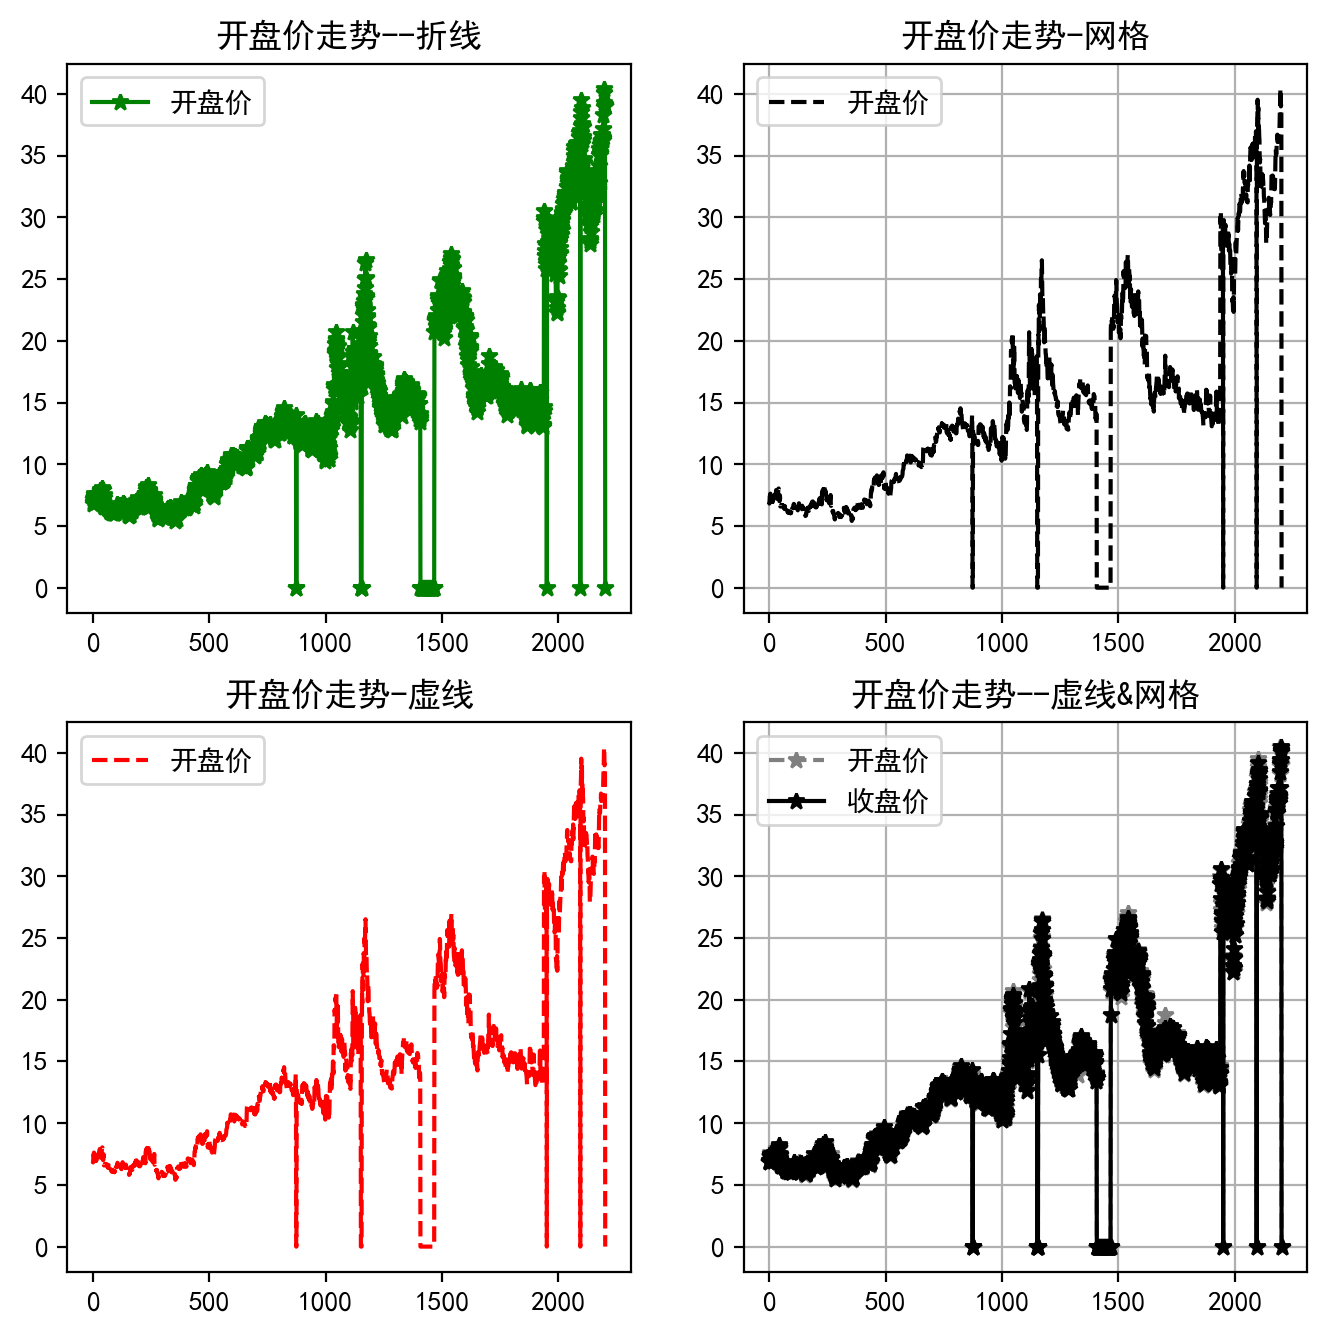

In [10]:
fig,axes=plt.subplots(2,2,figsize=(8,8),dpi=200)
# axes[0,0] axes[0,1] axes[1,0] axes[1,1]
data['开盘价'].plot(y='开盘价',kind='line',marker='*',title='开盘价走势--折线',color='green',ax=axes[0,0],legend='bool')
data['开盘价'].plot.line(y='开盘价',style='--',title='开盘价走势-虚线',color='red',ax=axes[1,0],legend='bool')
data['开盘价'].plot.line(y='开盘价',style='--',title='开盘价走势-网格',color='black',grid=True,ax=axes[0,1],legend='bool')
# 一个图形上两条线
data['开盘价'].plot(y='开盘价',kind='line',linestyle='--',marker='*',title='开盘价走势--虚线&网格',
                 color='gray',ax=axes[1,1],grid=True,legend='bool')
data['收盘价'].plot(y='收盘价',kind='line',marker='*',
                 color='black',ax=axes[1,1],grid=True,legend='bool');

### 3.2.2 指定坐标系中绘图

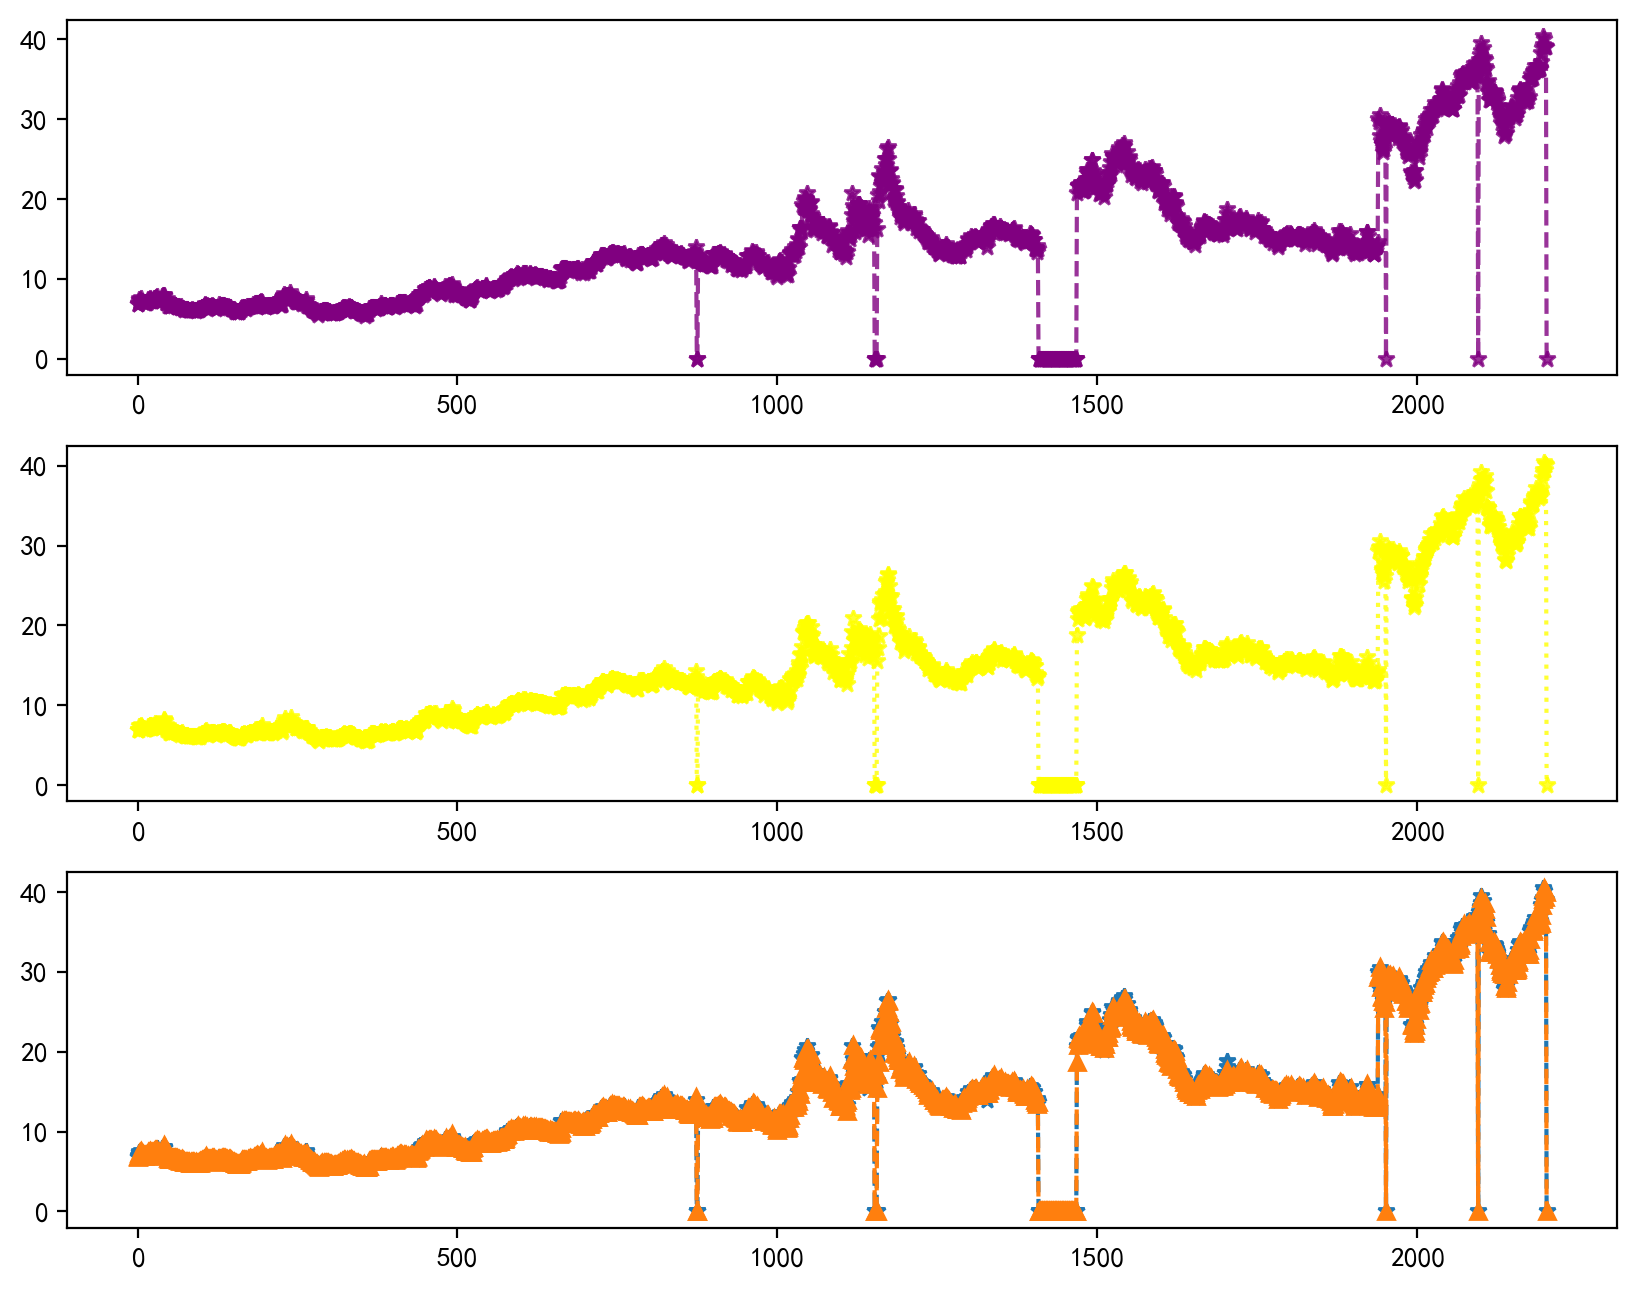

In [11]:
fig,axes=plt.subplots(3,1,figsize=(10,8),dpi=200)
# 不能设定网格参数 grid=True
axes[0].plot(data['开盘价'],linestyle='--',marker='*',color='purple',alpha=0.8)
# linestyle:线的风格【'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'】
axes[1].plot(data['收盘价'],linestyle='dotted',marker='*',color='yellow',alpha=0.8)
# 一图多线
axes[2].plot(data['开盘价'],'*--',data['收盘价'],'^--');

# 4.坐标系基本元素的设定
- 图的基本元素如下： 图名 x轴标签 y轴标签 图例 x轴边界 y轴边界 x刻度 y刻度 x刻度标签 y刻度标签
- 添加标题、文本注释
    - 添加文本注释：ax.text(x,y,s,rotation=45，va='bottom') s:'文本内容'

In [12]:
data.describe()

,收盘价,最高价,最低价,开盘价,前收盘,换手率,成交量,成交金额,总市值,流通市值,成交笔数,年份,月份
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2.203000e+03,2.203000e+03,2.203000e+03,2.203000e+03,2203.000000,2203.000000,2203.000000
mean,14.655983,14.897385,14.401099,14.641289,15.188865,1.621580,3.587722e+06,5.166736e+07,3.730938e+09,3.100991e+09,2913.851566,2015.228779,6.576941
std,8.156764,8.300137,8.021583,8.152142,7.785064,2.022911,4.053103e+06,6.778113e+07,1.162115e+09,1.474686e+09,3056.574096,2.632216,3.423334
min,0.000000,0.000000,0.000000,0.000000,5.500000,0.000000,0.000000e+00,0.000000e+00,1.820234e+09,0.000000e+00,0.000000,2011.000000,1.000000
25%,8.310000,8.525000,8.150000,8.320000,8.965000,0.584650,1.206659e+06,1.349692e+07,2.915132e+09,2.086794e+09,1175.000000,2013.000000,4.000000
50%,13.380000,13.590000,13.160000,13.340000,13.720000,1.090700,2.229400e+06,2.912534e+07,3.652602e+09,2.829636e+09,1950.000000,2015.000000,7.000000
75%,17.035000,17.375000,16.715000,17.000000,17.490000,2.051100,4.370850e+06,6.026863e+07,4.386763e+09,4.216323e+09,3497.500000,2017.000000,9.000000
max,40.450000,41.990000,39.830000,40.450000,40.450000,52.531200,3.842529e+07,7.905177e+08,8.750360e+09,8.750360e+09,37597.000000,2020.000000,12.000000


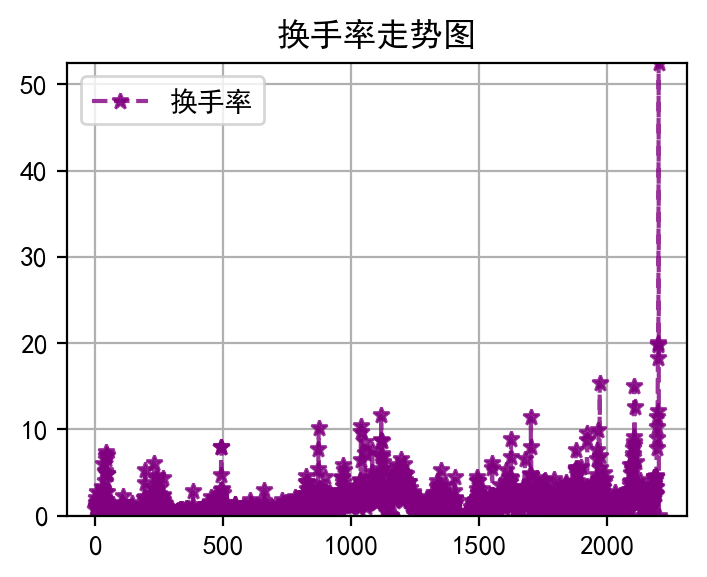

In [13]:
fig,ax=plt.subplots(1,1,figsize=(4,3),dpi=200)
ax.plot(data['换手率'],linestyle='--',marker='*',color='purple',alpha=0.8,label='换手率')
# 添加图形添加标题
ax.set_title('换手率走势图')
# 设置x轴 y轴的区间范围
ax.set_ylim([min(data['换手率']),max(data['换手率'])])
# ax.set_xlim([0,1000])
# x、y刻度线
# h1=range(0,2000,3)
# ax.set_xticks(h1)
# v1=range(0,60,3)
# ax.set_yticks(v1)
# x、y刻度标签
# ax.set_xticklabels(h1,fontdict={'fontsize':20})
# ax.set_yticklabels(v1,fontdict={'fontsize':20})
# 添加图例
ax.legend(loc='upper left')
# 添加网格
ax.grid()

Text(1250, 20, '前收盘走势图')

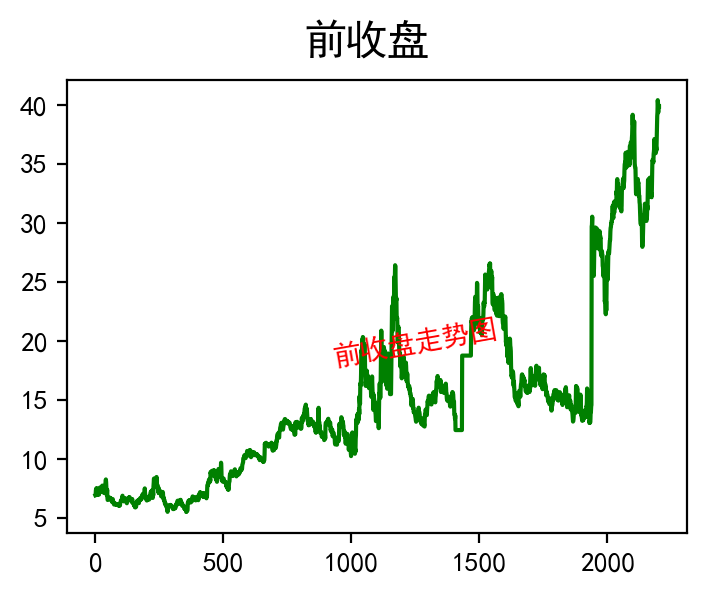

In [14]:
fig,ax=plt.subplots(1,1,figsize=(4,3),dpi=200)
# 给Figure对象添加标题
fig.suptitle('前收盘',fontsize=15) 
ax.plot(data['前收盘'],color='green')
# ax.grid()
# 指定位置添加文字注释
# rotation=45  旋转角度     
#va="bottom"的意思是文字注释的底部的纵坐标是0。垂直方向
#ha='center'   水平方向
ax.text(1250,20,'前收盘走势图',rotation=10,color='red',va='center',ha='center')  

# 5.图形的形状

## 5.1折线图

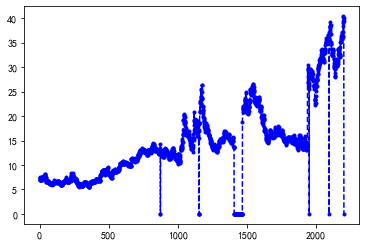

In [15]:
# style 风格样式设置 'k--' 'b--' 'b.--' 颜色，线条形式、数据点显示形式
data['收盘价'].plot(style='b.--');

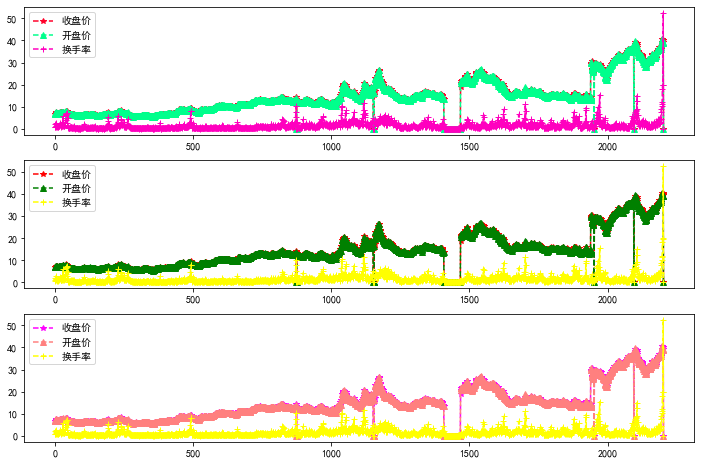

In [16]:
'''
如果一图上多个变量，可以用调色板 colormap 【Greens cool】
若变量是2-4个，也可以手动设定颜色 color=[] 
运用字典的形式可以为多条线分别指定线条形式、线条颜色等
style={：，：，：，：}
'''
fig,axes=plt.subplots(3,1,figsize=(12,8))
data.loc[:,['收盘价','开盘价','换手率']].plot(style=['*--','^--','+--'],colormap='gist_rainbow',ax=axes[0])
data.loc[:,['收盘价','开盘价','换手率']].plot(style=['*--','^--','+--'],color=['red','green','yellow'],ax=axes[1]);
data.loc[:,['收盘价','开盘价','换手率']].plot(style={'收盘价':'*--','开盘价':'^--','换手率':'+--'},colormap='spring',ax=axes[2])


## 5.2 条形图、柱状图

In [17]:
# 年份情况统计
# datact=pd.DataFrame(data['年份'].value_counts())
# datact=datact.rename(columns={'年份':'个数'})
# datact=datact.sort_index()
# datact.head()
# 其实不用转换成数据框，在序列的情况下也可以的
datact=data['年份'].value_counts()
datact=datact.sort_index()
type(datact) #pandas.core.series.Series
datact.head()

2011    197
2012    243
2013    238
2014    245
2015    244
Name: 年份, dtype: int64

In [18]:
# 月份情况统计
datayt=data['月份'].value_counts().sort_index()
datayt.head()

1    174
2    151
3    208
4    176
5    188
Name: 月份, dtype: int64

In [19]:
dataym=data[['开盘价','收盘价']].groupby(data['年份']).mean().round(1)
dataym.head()

,开盘价,收盘价
年份,,
2011,32.9,32.9
2012,18.0,18.0
2013,19.0,19.1
2014,13.1,13.1
2015,16.7,16.7


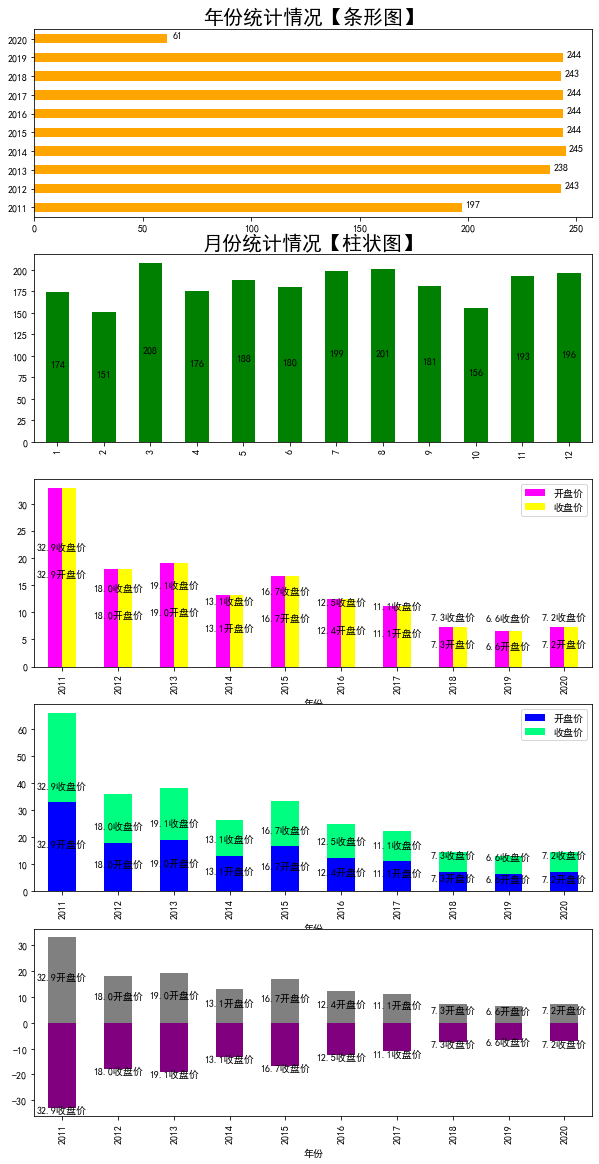

In [20]:
fig,axes=plt.subplots(5,1,figsize=(10,20))
# 第1个图形 条形图【横向】
datact.plot.barh(color='orange',ax=axes[0]);
axes[0].set_title('年份统计情况【条形图】',fontsize=20)
# axes[0].set_xlabel('年份')
# 在图形上添加具体的数值 【柱状图上方中心位置】
for x,y in enumerate(datact):
#     print(x,y,'%s' %round(y,0)) #'%s' %round(y,1) 数值转换成字符串
    axes[0].text(y+5,x,'%s' %round(y,1),ha='center')
# 第2个图形 柱状图【纵向】
datayt.plot.bar(color='green',ax=axes[1]);
axes[1].set_title('月份统计情况【柱状图】',fontsize=20)
for a,b in enumerate(datayt):
    axes[1].text(a,b/2,'%s'%round(b,1),ha='center')
# 柱状图 【多变量】 条多变量下的条形图类同
dataym[['开盘价','收盘价']].plot.bar(colormap='spring',ax=axes[2]);
for c,d in enumerate(dataym['开盘价']):
    axes[2].text(c,d/2,'%s开盘价'%round(d,1),ha='center')
for d,e in enumerate(dataym['收盘价']):
    axes[2].text(d,e/2+5,'%s收盘价'%round(e,1),ha='center')
# 柱状图情况下演变的堆积条形图
# stacked=True  表明纵向条形图是堆积的
dataym[['开盘价','收盘价']].plot.bar(colormap='winter',ax=axes[3],
                               stacked=True);
for c,d in enumerate(dataym['开盘价']):
    axes[3].text(c,d/2,'%s开盘价'%round(d,1),ha='center')
for d,e in enumerate(dataym['收盘价']):
    axes[3].text(d,e+5,'%s收盘价'%round(e,1),ha='center')
# 上下两个方向的柱状图
'''
思路:
轴上的保持不动
轴下的将数据取负后绘制图形
'''
dataym['开盘价'].plot.bar(color='gray',ax=axes[4])
dataym['-收盘价']=-dataym['收盘价']
dataym['-收盘价'].plot.bar(color='purple',ax=axes[4]);
for c,d in enumerate(dataym['开盘价']):
    axes[4].text(c,d/2,'%s开盘价'%round(d,1),ha='center')
for d,e in enumerate(dataym['收盘价']):
    axes[4].text(d,-(e+2),'%s收盘价'%round(e,1),ha='center')
#  绘制的图形进行保存
fig.savefig('条形图和柱状图.png')

## 5.3 面积图【area】、填图fill
- 注意：填图的填的是端点连接与函数构成的封闭区域进行填充

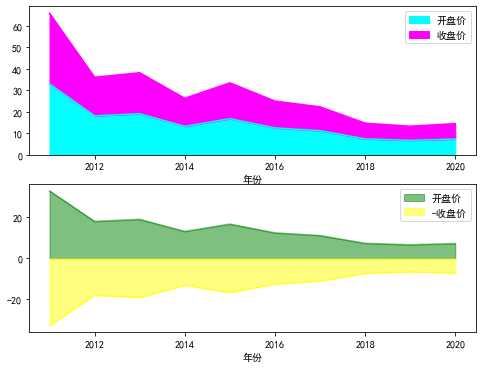

In [21]:
# area 面积图
fig,axes=plt.subplots(2,1,figsize=(8,6))
dataym[['开盘价','收盘价']].plot.area(stacked=True,colormap='cool',ax=axes[0]);
dataym[['开盘价','-收盘价']].plot.area(stacked=False,color=['green','yellow'],ax=axes[1]);
# 由于开盘价和收盘价的差距不是很大，所以不设置堆积的条件下，不易区分出两者的

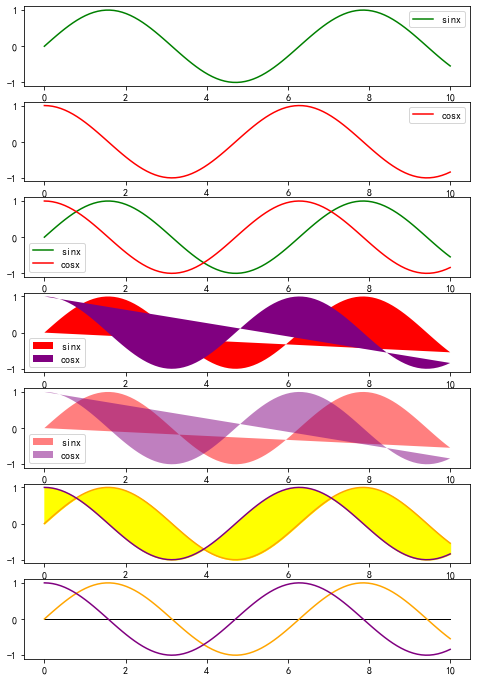

In [22]:
# fill 填图
fig,axes=plt.subplots(7,1,figsize=(8,12));
# np.linspace 函数，将设定的区间进行平等划分
x=np.linspace(0,10,100)
y=np.linspace(0,0,100)
y1=np.sin(x)
y2=np.cos(x)
# sinx函数图
axes[0].plot(x,y1,label='sinx',color='green')
axes[0].legend()
# cosx函数图
axes[1].plot(x,y2,label='cosx',color='red')
axes[1].legend()
# sinx与cosx绘制到一起
axes[2].plot(x,y1,'g',x,y2,'r')
axes[2].legend(['sinx','cosx'])
# fill 对函数与某个轴之间的区域进行填充 
# 轴：起始点和结束点连线而成
axes[3].fill(x,y1,'r',x,y2,'purple')
axes[3].legend(['sinx','cosx'],loc='lower left')
axes[4].fill(x,y1,'r',x,y2,'purple',alpha=0.5)
axes[4].legend(['sinx','cosx'],loc='lower left')
# fill_betwwen 方法可以填充两根折线之间的区域
axes[5].plot(x,y1,'orange',x,y2,'purple')
axes[5].fill_between(x,y1,y2,color='yellow');
# 添加x轴
axes[6].plot(x,y1,'orange',x,y2,'purple')
axes[6].fill(x,y,color='black')

## 5.4 饼图


plt.pie(
    x,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    *,
    normalize=None,
    data=None,
)
- explode:指定每部分的偏移量（指定扇形与原点分离的情况）
- autopct:每个扇区值标签的显示方式
- pctdistance：扇区值标签的相对位置，相对于半径而言。默认值是0.6
- labeldistance：每个扇形标签的（放射状）位置，默认1:1
- shadow：阴影
- startangle：开始角度
- radius：半径
- frame：图框
- counterclock：指定指针方向，顺时针或者逆时针

ax.pie()


- legend() local参数的选择  图例的添加及所处的位置
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============

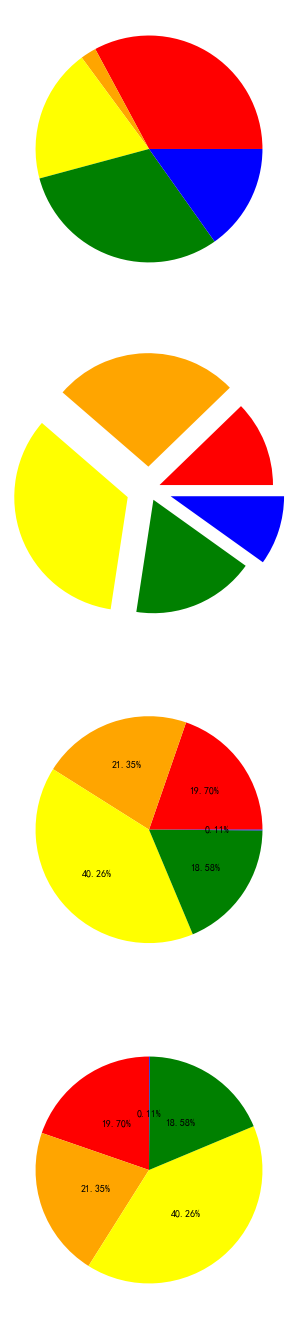

In [23]:
fig,axes=plt.subplots(4,1,figsize=(12,24))
# random函数产生一些随机数
df=pd.DataFrame(np.random.rand(5,3),index=list('abcde'),columns=list('xyz'))
# df
ys=['red','orange','yellow','green','blue'] #pink 粉色
axes[0].pie(df['x'],colors=ys)
# axes[0].legend(list('abcde'),loc='lower left')
# 各扇形与原点分离
axes[1].pie(df['y'],explode=[0.1,0.2,0.2,0.1,0.2],colors=ys)
# 总结一下上述的两个图形，axes[0].pie()函数中的参数中只有没有colormap
# autopct='%.2f%%' 值标签显示为小数点后两位且带百分比符号  textprops={'fontsize':10}：值标签的字体大小
axes[2].pie(df['z'],colors=ys,pctdistance=0.6,autopct='%.2f%%',textprops={'fontsize':10});
# startangle 开始的角度
axes[3].pie(df['z'],colors=ys,pctdistance=0.5,startangle=90,autopct='%.2f%%',textprops={'fontsize':10});

## 5.5 直方图、核密度图
- 直方图：plt.hist()
    - plt.hist(
        x,
        bins=None,
        range=None,
        density=None,
        weights=None,
        cumulative=False,
        bottom=None,
        histtype='bar',
        align='mid',
        orientation='vertical',
        rwidth=None,
        log=False,
        color=None,
        label=None,
        stacked=False,
        normed=None,
        *,
        data=None,
        **kwargs,)
        - bins:分组个数
        - normed:标准化
        - histtype:风格 [bar、barstacked、step、stepfilled]
        - orientation 水平还是垂直{'horizontal','vertical'}
        - align:{'left','mid','right'},optional(对齐方式)
        - stacked:是否堆叠
    - ax.hist()
- 核密度图:
    - df.plot.kde(bw_method=None, ind=None,style='r--',**kwargs)

numpy库中的random板块随机数:
- rand
- randint
- uniform
- normal

高斯正态分布表达式：
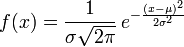

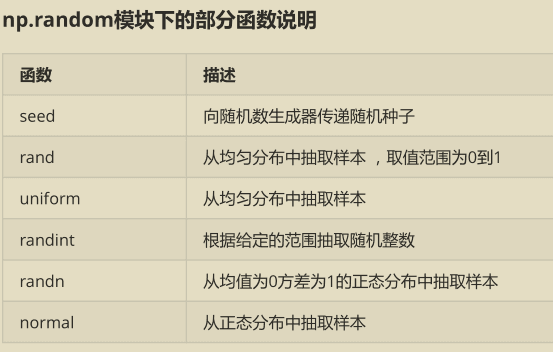

In [24]:
'''
均匀分布：
rand(d0, d1, ..., dn) #[0,1]之间均匀分布的随机样本
uniform(low=0.0, high=1.0, size=None) #产生的随机数
    【low -- 随机数的最小值，包含该值。;high -- 随机数的最大值，不包含该值。;返回一个浮点数】
随机整数：
randint(low, high=None, size=None, dtype='l') #指定区间的随机整数
正态分布
randn(d0, d1, ..., dn) #均值为0、方差为1的标准正态分布
normal(loc=0.0, scale=1.0, size=None) #正态分布
'''
# 随机种子  作用：将产生的随机数固定，再次运行时结果不会发生变化
# np.random.seed(0)
# np.random.RandomState(0)
frame={'x':np.random.rand(10),
       'y':np.random.uniform(0,50,10),
      'z':np.random.randint(0,100,10),
       'o':np.random.randn(10),
      'p':np.random.normal(2,4,10)}
df1=pd.DataFrame(frame,index=list('abcdefghij'))
df1

,x,y,z,o,p
a,0.427055,1.734128,34,-1.266324,3.749518
b,0.805546,31.153051,66,1.572308,1.434132
c,0.954177,25.872441,81,-0.364337,-0.614629
d,0.248843,14.452629,30,-0.560370,5.658479
e,0.222543,44.087246,0,1.972962,4.827298
f,0.145268,47.201190,15,0.434910,8.157675
g,0.815311,12.866967,36,-0.734599,7.296190
h,0.786497,43.761087,88,0.569786,-1.831059
i,0.541443,22.259776,30,1.514981,3.937420
j,0.302609,47.898445,83,0.239193,-2.272127


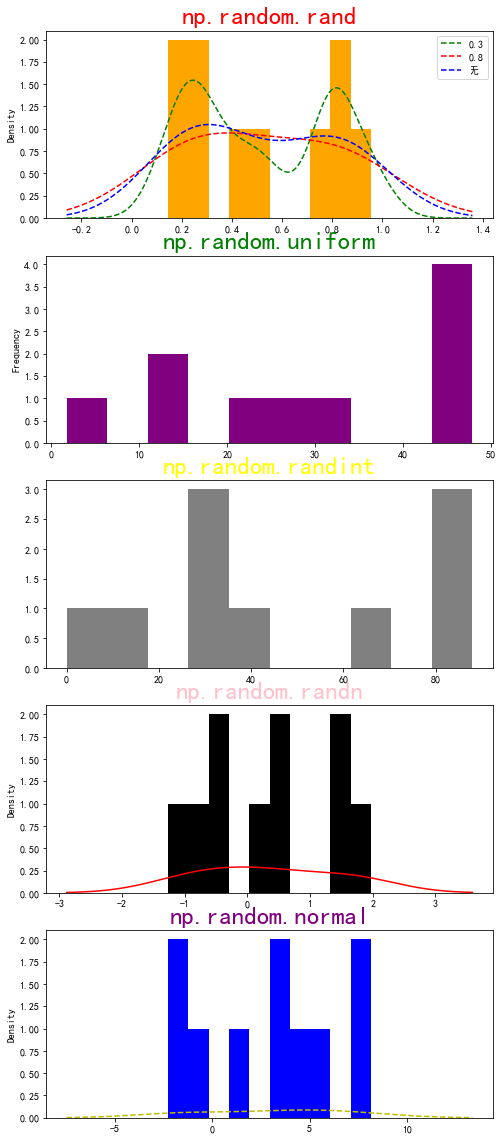

In [25]:
fig,axes=plt.subplots(5,1,figsize=(8,20))

axes[0].hist(df1['x'],color='orange');
# 添加核密度图
df1['x'].plot.kde(bw_method=0.3,style='g--',ax=axes[0],label='0.3')
df1['x'].plot.kde(bw_method=0.8,style='r--',ax=axes[0],label='0.8')
df1['x'].plot.kde(style='b--',ax=axes[0],label='无')
axes[0].set_title('np.random.rand',fontsize=25,color='red')
axes[0].legend()

df1['y'].plot.hist(color='purple',ax=axes[1])
axes[1].set_title('np.random.uniform',fontsize=25,color='green')

axes[2].hist(df1['z'],color='gray')
axes[2].set_title('np.random.randint',fontsize=25,color='yellow')

axes[3].hist(df1['o'],color='black')
df1['o'].plot.kde(style='r-',ax=axes[3])
axes[3].set_title('np.random.randn',fontsize=25,color='pink')

df1['p'].plot.hist(color='blue',ax=axes[4])
# df1['p'].hist(color='blue',ax=axes[4]) #图形会产生网格 设定参数grid=False，可消除网格
df1['p'].plot.kde(style='y--',ax=axes[4])
axes[4].set_title('np.random.normal',fontsize=25,color='purple');
# 将绘制的图形进行保存
# fig.savefig('hahha.png')

### 分组直方图：
- 一般不使用
- 不能设定legend参数

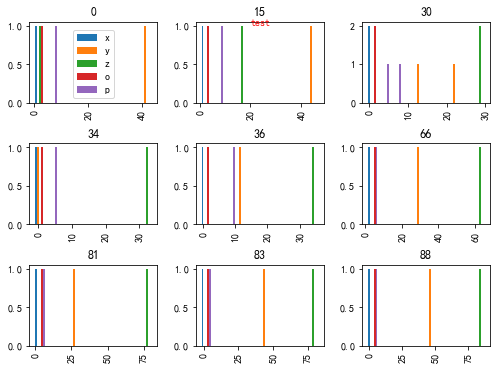

In [26]:
# 查看hist函数
# help(df1.hist)
axes=df1.hist(column=['x','y','o','p'],
              by=df1['z'],figsize=(8,6));
# df1.hist函数中没有legend参数
axes[0,0].legend('xyzop')
# 添加文本
axes[0,1].text(20,1,'test',color='red');

## 5.6 散点图
plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    verts=None,
    edgecolors=None,
    plotnonfinite=False,
    data=None,kwargs,)
- s:散点的大小 可以放一个变量，则得到的是气泡图
- c:散点的颜色 可以放一个变量，此时需要用到cmp 颜色板
- vmin,vmax:亮度设置,标量
- cmap：colormap

### 5.6.1 常规散点图
- df1.plot.scatter(x,y,s,c)
- axes[0].scatter(df1['x'],df['y'],s,c)
- 参数barcolor 只能在df1.plot.scatter上运用

In [27]:
df2=pd.DataFrame(np.random.randn(100).reshape(20,5),columns=list('abcde'))
df2.head()

,a,b,c,d,e
0,0.559487,0.644174,0.304198,-1.204237,-2.095581
1,-0.178994,0.335686,-1.245210,-0.681587,-0.714716
2,-0.567734,0.903006,-0.926473,1.874088,-0.991545
3,-0.432360,-0.910380,1.154825,-0.389269,-0.262183
4,-0.117766,0.824547,0.548160,0.680533,-0.050772


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


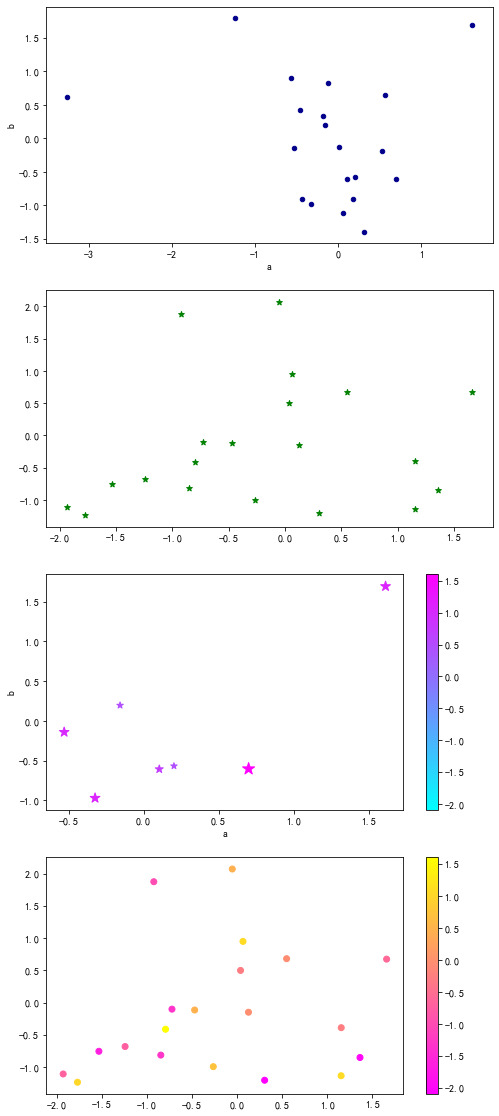

In [28]:
fig,axes=plt.subplots(4,1,figsize=(8,20))
df2.plot.scatter(x='a',y='b',c='DarkBlue',ax=axes[0])
axes[1].scatter(df2['c'],df2['d'],c='green',marker='*')

# 气泡图 x,y z代表气泡的大小 涉及的参数colorbar 颜色条 ，仅用于df1.plot.scatter上 默认的是colorbar=True
# s=df2['c']*20 点的大小程度 c=df2['c']*20 根据大小得到的不同的颜色
df2.plot.scatter(x='a',y='b',s=df2['e']*100,c=df2['e'],marker='*',ax=axes[2],cmap='cool')
# 下面这种形式没有colorbar参数，需要单独设置
temp=axes[3].scatter(df2['c'],df2['d'],c=df2['e'],cmap='spring');
fig.colorbar(temp,ax=axes[3]);

### 5.6.2 散点矩阵
- pd.plotting.scatter_matrix()
 -  pd.plotting.scatter_matrix(
    frame,
    alpha=0.5,
    figsize=None,
    ax=None,
    grid=False,
    diagonal='hist',
    marker='.',
    density_kwds=None,
    hist_kwds=None,
    range_padding=0.05,
    **kwargs,
    )
- 参数   diagonal='kde'  表明在对角线上显示的是变量的分布状况
- 参数   range_padding=0.05 图像在x轴、y轴原点附近的留白范围；值越大，留白距离越大，图离坐标原点远
- 散点矩阵会占据整个figure，因此不考虑ax参数

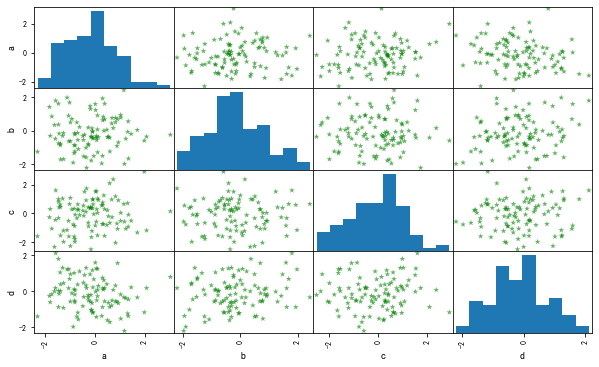

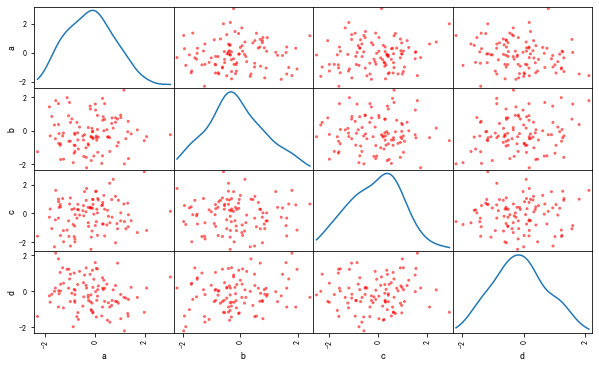

In [29]:
df3=pd.DataFrame(np.random.randn(100,4),columns=list('abcd'))
# 默认的是直方图 diagonal='hist'
pd.plotting.scatter_matrix(df3,alpha=0.6,figsize=(10,6),marker='*',color='green')
pd.plotting.scatter_matrix(df3,alpha=0.6,figsize=(10,6),marker='.',diagonal='kde',color='red');

## 5.7 箱线图【箱型图、盒须图、盒状图】
- 显示一组数据分布情况的统计图形
- 组成：最小值、最大值、中位数、上四分位数(Q1)、下四分位数(Q3)、异常值
- 上下边界：Q3+1.5(Q3-Q1) Q1-1.5(Q3-Q1)
- 异常值：上下边界外的值

### 5.7.1 df.plot.box
- color：颜色
- boxes 箱子
- medians 中位线
- whiskers 分位数与error bar 横线之间竖线(胡须)
- caps 【上下边界】胡须末端的水平线
- vert 箱线图的放置 默认True 竖置
- positions：占位
- ylim:轴的值区间
- sym:异常点的形状和颜色

In [30]:
df5=pd.DataFrame(np.random.normal(2,4,20).reshape(4,5),columns=list('abcde'))
df5.describe()

,a,b,c,d,e
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2.886813,1.069094,1.196179,1.331872,2.453846
std,3.728074,4.239473,4.078093,0.671389,3.040402
min,-0.711766,-3.846193,-2.560112,0.458109,-0.792152
25%,-0.122545,-0.458473,-2.188217,0.981771,0.638148
50%,2.896374,0.807138,1.061491,1.475832,2.148621
75%,5.905731,2.334706,4.445887,1.825932,3.964319
max,6.466269,6.508294,5.221844,1.917714,6.310296


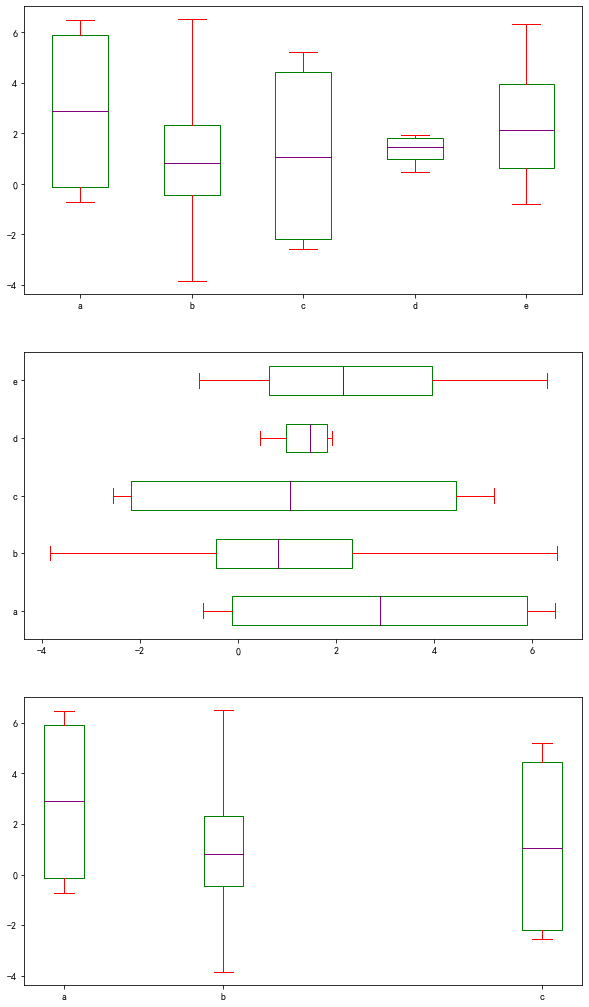

In [31]:
fig,axes=plt.subplots(3,1,figsize=(10,18))
# 设定箱线图各部分的颜色,字典的形式存储
colors=dict(boxes='green',whiskers='red',medians='purple',caps='red')
# 竖置的箱线图
df5.plot.box(color=colors,ax=axes[0])
# 横置的箱线图
df5.plot.box(color=colors,ax=axes[1],vert=False)
# positions 箱子所处的位置
df5[['a','b','c']].plot.box(positions=[1,3,7],ax=axes[2],color=colors,sym='k*');

### 5.7.1 df.boxplot
df1.boxplot(
    column=None,
    by=None,
    ax=None,
    fontsize=None,
    rot=0,
    grid=True,
    figsize=None,
    layout=None,
    return_type=None,
    backend=None,
    **kwargs,)
-  column:按照数据的列画图
-  by:按照列分组画图

In [32]:
# df5数据上新增一列类别 0 1
np.random.seed(0)
df5['g']=pd.Series(np.random.randint(2, size=5))
df5

,a,b,c,d,e,g
0,-0.711766,-3.846193,-2.560112,1.156325,3.182327,0
1,5.718885,6.508294,-2.064252,1.795338,6.310296,1
2,6.466269,0.670767,5.221844,0.458109,-0.792152,1
3,0.073862,0.943510,4.187234,1.917714,1.114914,0


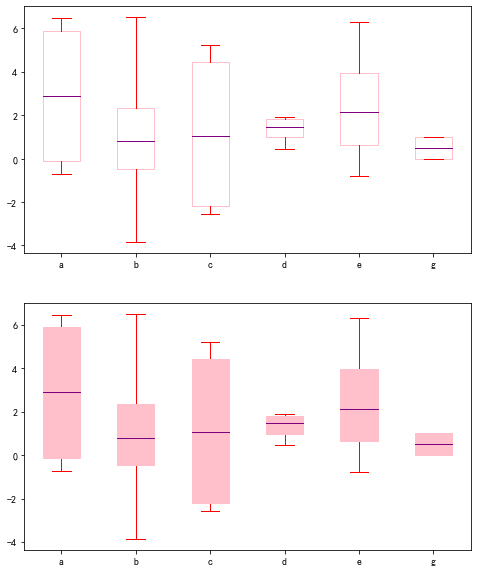

In [33]:
colors1=dict(boxes='pink',whiskers='red',medians='purple',caps='red')
fig,axes=plt.subplots(2,1,figsize=(8,10))
df5.boxplot(color=colors1,grid=False,ax=axes[0])
# 箱体填充 patch_artist 默认的是无填充
df5.boxplot(color=colors1,grid=False,patch_artist=True,ax=axes[1]);

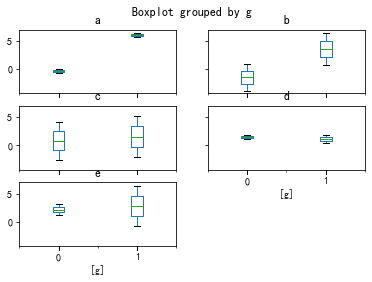

In [34]:
# 按照g列进行分组后求箱线图 分组汇总
df5.boxplot(column=['a','b','c','d','e'],by=['g'],grid=False);

## 6.雷达图
- 极坐标

### 封闭区域可以进行填充
- ax.fill()
    ax.fill(x, y)                    # a polygon with default color

    ax.fill(x, y, "b")               # a blue polygon

    ax.fill(x, y, x2, y2)            # two polygons

    ax.fill(x, y, "b", x2, y2, "r")  # a blue and a red polygon

In [35]:
np.random.seed(0)
df6=np.array(np.random.randint(0,100,5))
df7=np.array(np.random.randint(0,50,5))

In [36]:
# 创建极坐标 
# 弧度制单位 范围0-2π，1弧度=180/π 度
angles=np.linspace(0,2*np.pi,df6.shape[0],endpoint=False)
# 极坐标也闭合
angles=np.concatenate((angles,[angles[0]]))
# 将数据形成闭合状态 np.concatenate
df6=np.concatenate((df6,[df6[0]]))
df7=np.concatenate((df7,[df7[0]]))
lables=list('abcde')

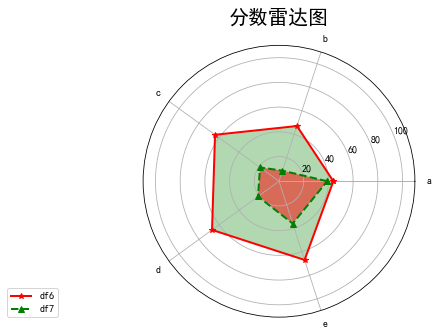

In [37]:
fig=plt.figure(figsize=(5,5))
# polar=True 坐标系则显示极坐标
ax=fig.add_subplot(1,1,1,polar=True)
ax.plot(angles,df6,'r*-',linewidth=2,label='df6')
ax.plot(angles,df7,'g^--',linewidth=2,label='df7')
ax.legend()
# alpha表示透明度
ax.fill(angles,df6,facecolor='g',alpha=0.3)
ax.fill(angles,df7,facecolor='r',alpha=0.5)
# set_thetagrids：设定每个特征的标签，角度制表示角的度数
# 第一步：弧度转角度
angles1=angles*(180/np.pi)
# 第二步：设置每个特征的标签，范围0-360度之间 fmt字体
ax.set_thetagrids(angles1,lables,fmt='SimHei')
#设置角度的范围 左包含 右不包含
ax.set_rlim(0,110)
# 设置标题  垂直方式：verticalalignment【va】
ax.set_title('分数雷达图',va='bottom',
             fontproperties='SimHei',fontsize=20)
# 去除网格
# ax.grid(False)
# 添加图例、大致方位，坐标数值
ax.legend(loc='lower right')
ax.legend(loc=(-0.5,0));

## 7.图形保存

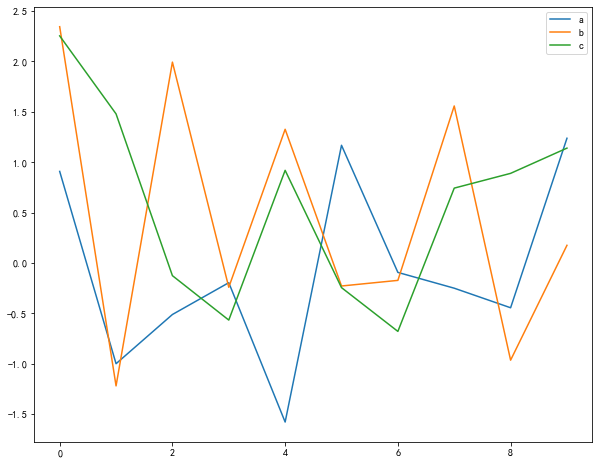

In [41]:
df8=pd.DataFrame(np.random.randn(10,3),columns=list('abc'))
fig,ax=plt.subplots(1,1,figsize=(10,8))
df8.plot(ax=ax)
fig.savefig('ha.png')